In [ ]:
#initial code

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import xml.etree.ElementTree as ET
import timeit
from time import time
import math

In [2]:
# Function to parse the XML file and extract city data
def parse_xml(xml_file):
    city_data = []
    tree = ET.parse(xml_file)
    root = tree.getroot()

    for vertex_elem in root.findall(".//vertex"):
        edge_costs = [float(edge.get("cost")) for edge in vertex_elem]
        city_data.append(edge_costs)

    return city_data

In [3]:
cities = parse_xml("burma14.xml")
#cities = parse_xml("brazil58.xml")

In [4]:
for i, vertex in enumerate(cities, start=1):
        print(f"Vertex {i} - Edge Costs: {vertex}")

Vertex 1 - Edge Costs: [153.0, 510.0, 706.0, 966.0, 581.0, 455.0, 70.0, 160.0, 372.0, 157.0, 567.0, 342.0, 398.0]
Vertex 2 - Edge Costs: [153.0, 422.0, 664.0, 997.0, 598.0, 507.0, 197.0, 311.0, 479.0, 310.0, 581.0, 417.0, 376.0]
Vertex 3 - Edge Costs: [510.0, 422.0, 289.0, 744.0, 390.0, 437.0, 491.0, 645.0, 880.0, 618.0, 374.0, 455.0, 211.0]
Vertex 4 - Edge Costs: [706.0, 664.0, 289.0, 491.0, 265.0, 410.0, 664.0, 804.0, 1070.0, 768.0, 259.0, 499.0, 310.0]
Vertex 5 - Edge Costs: [966.0, 997.0, 744.0, 491.0, 400.0, 514.0, 902.0, 990.0, 1261.0, 947.0, 418.0, 635.0, 636.0]
Vertex 6 - Edge Costs: [581.0, 598.0, 390.0, 265.0, 400.0, 168.0, 522.0, 634.0, 910.0, 593.0, 19.0, 284.0, 239.0]
Vertex 7 - Edge Costs: [455.0, 507.0, 437.0, 410.0, 514.0, 168.0, 389.0, 482.0, 757.0, 439.0, 163.0, 124.0, 232.0]
Vertex 8 - Edge Costs: [70.0, 197.0, 491.0, 664.0, 902.0, 522.0, 389.0, 154.0, 406.0, 133.0, 508.0, 273.0, 355.0]
Vertex 9 - Edge Costs: [160.0, 311.0, 645.0, 804.0, 990.0, 634.0, 482.0, 154.0, 2

In [5]:
# Calculate the total distance of a tour
def tour_distance(tour, distances):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i]][tour[i + 1]]
    total_distance += distances[tour[-1]][tour[0]]  # Return to the starting city
    return total_distance

In [6]:
# Generate an initial population of random tours
def generate_population(num_individuals, num_cities):
    population = []
    for _ in range(num_individuals):
        tour = list(range(num_cities))
        random.shuffle(tour)
        population.append(tour)
    return population

In [7]:
# Perform single-point crossover
def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1))
    child1 = parent1[:crossover_point] + [c for c in parent2 if c not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [c for c in parent1 if c not in parent2[:crossover_point]]
    return child1, child2


In [8]:
# Perform swap mutation
def swap_mutation(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

In [9]:
#selecting parents
def select_parents(population, tournament_size,distances):
        parents = []
        for _ in range(2):  # Select two parents
            tournament = random.sample(population, tournament_size)
            best_individual = min(tournament, key=lambda x: tour_distance(x, distances))
            parents.append(best_individual)
        return parents

In [11]:
# EA main loop

def evolutionary_algorithm(cities, num_generations, population_size, mutation_rate):
    
    num_cities = len(cities)
    distances = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distances[i][j] = np.linalg.norm(np.array(cities[i]) - np.array(cities[j]))

    population = generate_population(population_size, num_cities)
    best_distance = 9999
    best_tour = None
    distances_log = []
    tournament_size=5

    for generation in range(num_generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 =select_parents(population, tournament_size,distances) 
            child1, child2 = single_point_crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child1 = swap_mutation(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutation(child2)
            new_population.extend([child1, child2])

        population = new_population
        # Calculate and store the best distance in each generation
        for individual in population:
            distance = tour_distance(individual, distances)
            if distance < best_distance:
                best_distance = distance
                best_tour = individual
        distances_log.append(best_distance)

    return best_tour, best_distance, distances_log


In [12]:
# Set EA parameters
num_generations = 10000
population_size = 100
mutation_rate = 0.1

iterations = [i for i in range(0,num_generations)]
iteration_db = pd.DataFrame({'iterations':iterations})

t0 = time()
    
best_tour,best_distance,distances_log =evolutionary_algorithm(cities, num_generations, population_size, mutation_rate)

t1 = time()

iteration_db['min_distance']=distances_log


In [14]:
iteration_db

,iterations,min_distance
0,0,9999.000000
1,1,9999.000000
2,2,9999.000000
3,3,9999.000000
4,4,9999.000000
...,...,...
9995,9995,9852.853869
9996,9996,9852.853869
9997,9997,9852.853869
9998,9998,9852.853869


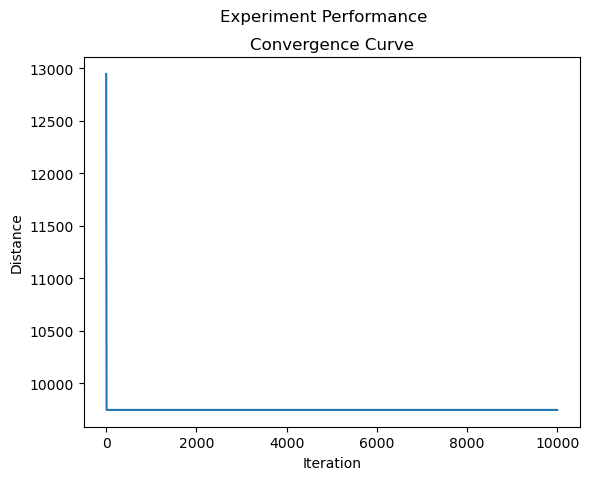

In [55]:
 # Plot convergence curve
fig, (ax2) = plt.subplots(1)
fig.suptitle('Experiment Performance')
ax2.plot(iterations, iteration_db['min_distance'])
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.title("Convergence Curve")
plt.show()


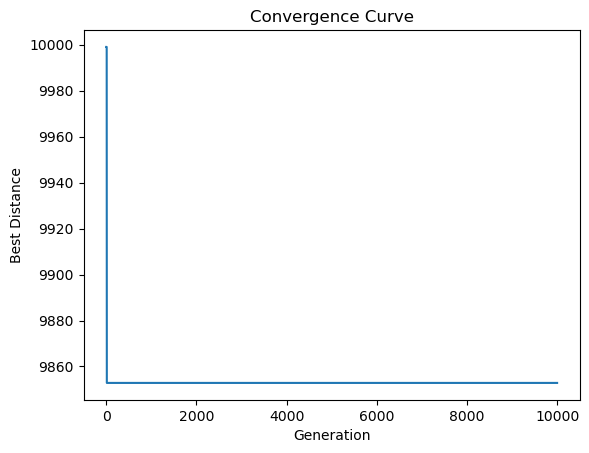

Best Tour: [8, 7, 12, 13, 11, 6, 5, 4, 3, 2, 1, 0, 10, 9]
Best Distance: 9852.853869092138


In [13]:
plt.plot(distances_log)
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.title("Convergence Curve")
plt.show()
print("Best Tour:", best_tour)
print("Best Distance:", best_distance)

In [61]:
print ('Evelotionary algorithm takes %f' %(t1-t0)+ ' seconds')

Evelotionary algorithm takes 68.051216 seconds
